In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('C:\\Users\\user\\Documents\\Machine Learning\\Datasets\\CCPP\\Folds5x2_pp.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


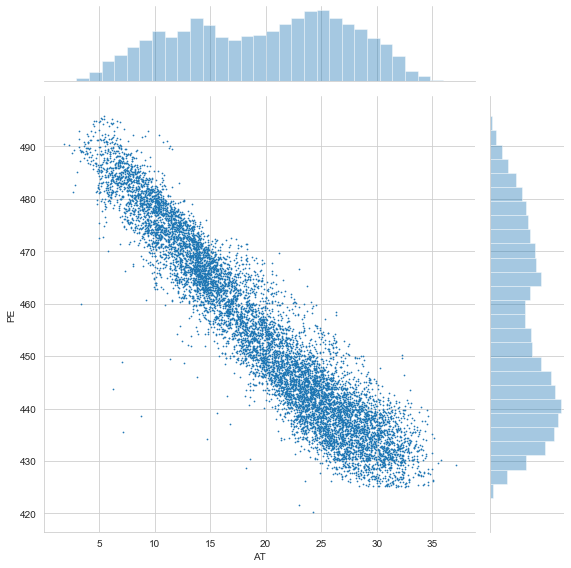

In [4]:
sns.set_style('whitegrid')
sns.jointplot(x='AT',y='PE',data=df,height=8,s=0.5)
plt.show()

In [5]:
# inverse relation between AT and PE

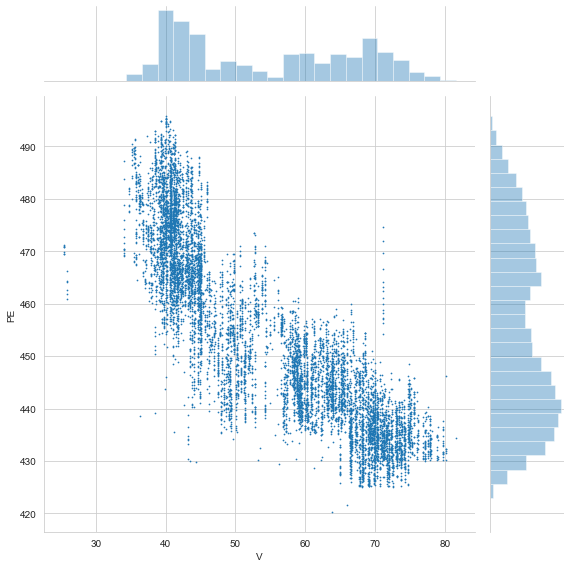

In [6]:
sns.jointplot(x='V',y='PE',data=df,height=8,s=0.5)
plt.show()

In [7]:
# inverse relation between V and PE

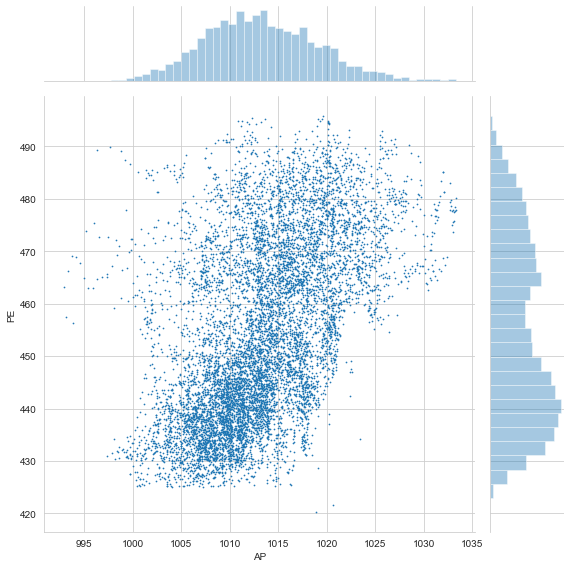

In [8]:
sns.jointplot(x='AP',y='PE',data=df,height=8,s=0.5)
plt.show()

In [9]:
# direct relation between AP and PE

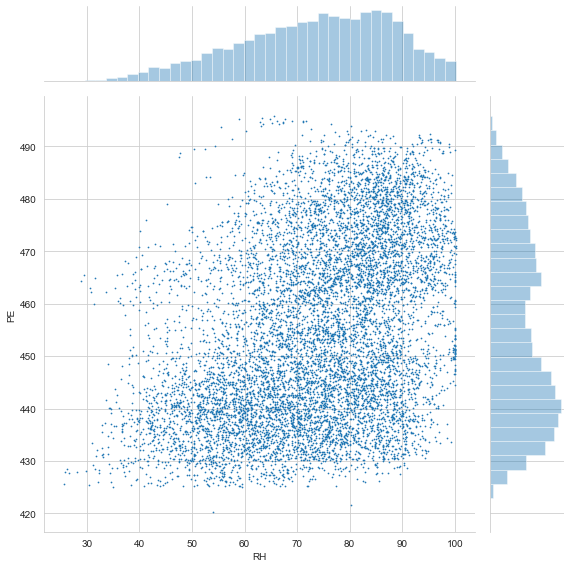

In [10]:
sns.jointplot(x='RH',y='PE',data=df,height=8,s=0.5)
plt.show()

In [11]:
# no exact relation between RH and PE

In [12]:
x = df.drop('PE',axis=1)
y = df['PE']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
import tensorflow as tf

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [15]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [16]:
ann.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
210/210 [==============================] - 0s 865us/step - loss: 103349.1719 - mean_squared_error: 103349.1719
Epoch 2/50
210/210 [==============================] - 0s 841us/step - loss: 5662.9375 - mean_squared_error: 5662.9375
Epoch 3/50
210/210 [==============================] - 0s 826us/step - loss: 2155.8318 - mean_squared_error: 2155.8318
Epoch 4/50
210/210 [==============================] - 0s 869us/step - loss: 965.9300 - mean_squared_error: 965.9300
Epoch 5/50
210/210 [==============================] - 0s 872us/step - loss: 456.2346 - mean_squared_error: 456.2346
Epoch 6/50
210/210 [==============================] - 0s 867us/step - loss: 235.7253 - mean_squared_error: 235.7253
Epoch 7/50
210/210 [==============================] - 0s 845us/step - loss: 135.9209 - mean_squared_error: 135.9209
Epoch 8/50
210/210 [==============================] - 0s 898us/step - loss: 87.4548 - mean_squared_error: 87.4548
Epoch 9/50
210/210 [==============================] - 0s 1ms/ste

In [17]:
pred = ann.predict(x_test)

In [18]:
from sklearn import metrics

In [19]:
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))
print(metrics.r2_score(y_test,pred))

3.3654798302937783
18.68719632357177
4.322868992182364
0.9374453054966462


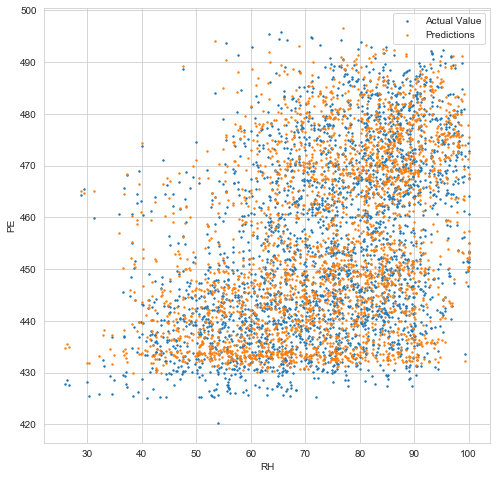

In [20]:
# superimposing actual PE values with predictions
plt.figure(figsize=(8,8))
plt.scatter(sc.inverse_transform(x_test)[:,3], y_test, s=2, label='Actual Value')
plt.scatter(sc.inverse_transform(x_test)[:,3], pred, s=2, label='Predictions')
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend(loc=0)
plt.show()

# using normal equation to compare with ANN

In [21]:
x_n = np.c_[np.ones((len(x),1)),x]
x_ntrain, x_ntest, y_ntrain, y_ntest = train_test_split(x_n,y,test_size=0.3)

In [22]:
theta_max = np.linalg.inv(x_ntrain.T.dot(x_ntrain)).dot(x_ntrain.T).dot(y_ntrain)
theta_max

array([ 4.61699185e+02, -1.97419634e+00, -2.39029439e-01,  5.54451189e-02,
       -1.59625310e-01])

In [23]:
y_pred = x_ntest.dot(theta_max)

In [24]:
print(metrics.mean_absolute_error(y_ntest,y_pred))
print(metrics.mean_squared_error(y_ntest,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_ntest,y_pred)))
print(metrics.r2_score(y_ntest,y_pred))

3.5717310716840496
20.244109516147002
4.499345454190754
0.9307028038461942


# performance index of normal equation (analytical method) came close to ANN but ANN performed slightly better